In [1]:
from JSU_lib import *

In [99]:
def add_mean_columns_rows(df):
    # Add a new column 'Row_Mean' that contains the mean of each row (ignoring NaN values)
    df['Row_Mean'] = df.apply(lambda row: np.nanmean(row), axis=1)
    
    # Create a new row containing the mean of each column (ignoring NaN values)
    col_means = df.apply(lambda col: np.nanmean(col), axis=0)
    
    # Append the new row to the dataframe
    col_means.name = 'Column_Mean'
    df = df.append(col_means)
    
    return df

In [188]:
LIGYSIS_sites = pd.read_pickle("./results/LIGYSIS_sites_DEF_TRANS.pkl")

In [190]:
seg_up_aas_dict = LIGYSIS_sites.groupby('SEG_ID')['up_aas'].apply(lambda x: set(sum(x, []))).to_dict()

In [191]:
seg_up_aas_dict

{'A0A0B4J272_1': {69, 70, 71, 78, 79, 80, 85, 98},
 'A1L3X0_1': {23,
  24,
  26,
  68,
  71,
  72,
  104,
  106,
  120,
  124,
  127,
  129,
  130,
  133,
  134,
  137,
  139,
  142,
  146,
  147,
  150,
  151,
  154,
  157,
  158,
  161,
  165,
  170,
  171,
  173,
  177,
  181,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193,
  197,
  198,
  200,
  201,
  202,
  203,
  204,
  206,
  207,
  208,
  210,
  211,
  214,
  215,
  218,
  233,
  238,
  241,
  242,
  245,
  246,
  249,
  253,
  256,
  261,
  266,
  269},
 'A1Z1Q3_1': {77,
  78,
  79,
  80,
  90,
  91,
  92,
  97,
  98,
  99,
  100,
  101,
  102,
  104,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  222,
  224,
  225,
  228},
 'A4D126_1': {125, 126, 127, 128, 233, 234, 235, 236, 237},
 'A4D2B0_1': {114, 116, 118, 119, 169, 192, 195, 231},
 'A6NHR9_1': {151,
  152,
  155,
  184,
  187,
  188,
  193,
  197,
  202,
  203,
  204,
  207,
  232,
  233,
  234,
  235,
  236,
  237,
  238,


In [200]:
LIGYSIS_sites.query('SEG_ID == "P49773_1"')

,ACC,SEG,ID,up_aas,n_aas,SEG_ID,SITE_NAME,pdb_id,auth_asym_id,struct_asym_id,rep_chain,RoG,aas,centre,SASA,VOL
5100,P49773,1,0,"[18, 19, 22, 27, 28, 29, 41, 42, 43, 44, 45, 5...",26,P49773_1,P49773_1_0,6b42,A,A,6b42_A,11.43,"[21, 22, 25, 30, 31, 32, 44, 45, 46, 47, 48, 5...","(-0.904, -2.151, 5.389)",1562.36,1466.0
5101,P49773,1,1,"[16, 17, 18, 107, 108, 109]",6,P49773_1,P49773_1_1,6b42,A,A,6b42_A,4.98,"[19, 20, 21, 110, 111, 112]","(-3.305, 8.616, 8.113)",384.41,45.0
5102,P49773,1,2,"[14, 17, 58, 59, 60, 109, 110]",7,P49773_1,P49773_1_2,6b42,A,A,6b42_A,6.72,"[17, 20, 61, 62, 63, 112, 113]","(-2.302, 11.853, 2.996)",457.38,158.0
5103,P49773,1,3,"[119, 120, 122]",3,P49773_1,P49773_1_3,6b42,A,A,6b42_A,3.98,"[122, 123, 125]","(-3.33, -18.399, 2.581)",365.60,10.0
5104,P49773,1,4,"[14, 15, 16, 17, 59]",5,P49773_1,P49773_1_4,6b42,A,A,6b42_A,5.45,"[17, 18, 19, 20, 62]","(-0.765, 14.962, 7.615)",396.35,79.0


In [4]:
dist_df_dicts = read_from_pickle("./../DATA/all_dist_dfs_dict.pkl")

In [133]:
strucs = []
chains = []
for k, v in dist_df_dicts.items():
    strucs.append(v[1].split("_")[0])
    chains.append(v[1].split(".")[0])
    prot_chains = v[0].columns.tolist()
    prot_strucs = [prot_chain.split("_")[0] for prot_chain in prot_chains]
    strucs.extend(prot_strucs)
    chains.extend(prot_chains)

In [134]:
print(len(set(strucs)))
print(len(set(chains)))

33715
64398


In [132]:
dist_df_dicts["Q9UGL1_1"][1]

'5fy4_A.pkl'

In [7]:
n_chains_dict = {k: v[0].T.shape[0]+1 for k, v in dist_df_dicts.items()}

In [122]:
sum(list(n_chains_dict.values()))

64397

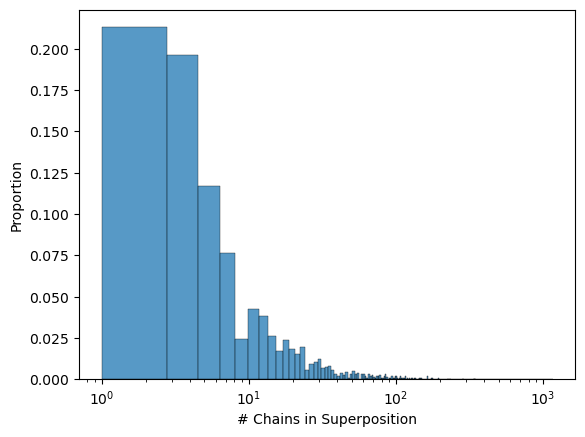

In [14]:
sns.histplot(list(n_chains_dict.values()), stat = "proportion", linewidth = 0.25)
plt.xscale('log')
plt.xlabel('# Chains in Superposition')
plt.show()

### All residue distances

#### ALL residues

In [47]:
ALL_residues = []
for k, v in dist_df_dicts.items():
    df = v[0]
    ALL_residues.extend(df.values.flatten().tolist())

In [48]:
len(ALL_residues)

18359047

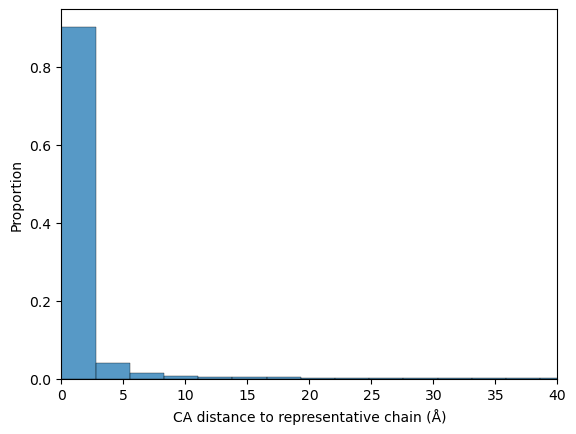

In [95]:
sns.histplot(ALL_residues, stat = "proportion", linewidth = 0.25, bins = 200)
plt.xlabel('CA distance to representative chain (Å)')
plt.xlim(0, 40)
plt.show()

In [97]:
ALL_residues_filt = [el for el in ALL_residues if math.isnan(el) == False]

N_ALL_residues = len(ALL_residues_filt)

print(round(100*(len([el for el in ALL_residues_filt if el <= 5])/N_ALL_residues), 2))

print(round(100*(len([el for el in ALL_residues_filt if el <= 2.5])/N_ALL_residues), 2))

93.83
89.48


#### Binding site residues

In [213]:
ks

2478

In [214]:
ALL_BS_residues = []
ks = 0
for k, v in dist_df_dicts.items():
    if k not in seg_up_aas_dict:
        continue
    else:
        try:
            bs_ress = seg_up_aas_dict[k]
            df = v[0]
            ALL_BS_residues.extend(df.loc[bs_ress, :].values.flatten().tolist())
            ks +=1
        except:
            #print(f'Error with {k}')
            pass

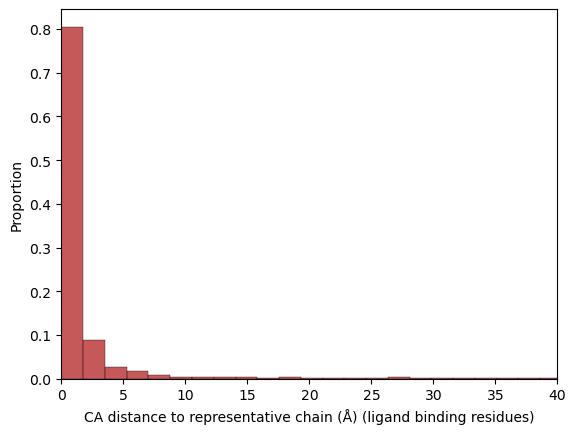

91.68
85.55


In [215]:
sns.histplot(ALL_BS_residues, stat = "proportion", linewidth = 0.25, bins = 200, color = "firebrick")
plt.xlabel('CA distance to representative chain (Å) (ligand binding residues)')
plt.xlim(0, 40)
plt.show()

ALL_BS_residues_filt = [el for el in ALL_BS_residues if math.isnan(el) == False]

N_ALL_BS_residues = len(ALL_BS_residues_filt)

print(round(100*(len([el for el in ALL_BS_residues_filt if el <= 5])/N_ALL_BS_residues), 2))

print(round(100*(len([el for el in ALL_BS_residues_filt if el <= 2.5])/N_ALL_BS_residues), 2))

### Mean distance per residue

#### ALL residues

In [51]:
MEAN_residues = []
for k, v in dist_df_dicts.items():
    df = v[0]
    df['res_mean'] = df.apply(lambda row: round(np.nanmean(row), 2), axis=1)
    MEAN_residues.extend(df.res_mean.tolist())

In [52]:
len(MEAN_residues)

938808

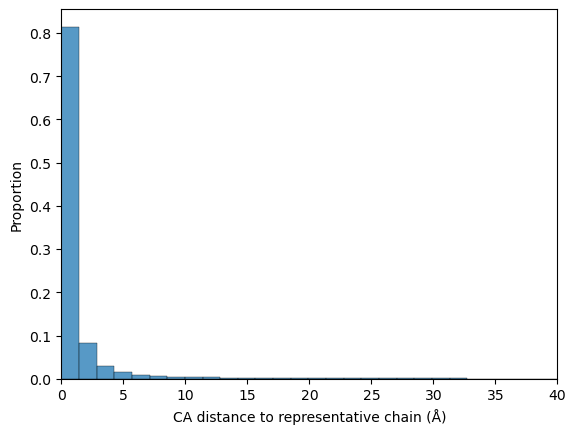

In [91]:
sns.histplot(MEAN_residues, stat = "proportion", linewidth = 0.25, bins = 200)
plt.xlabel('CA distance to representative chain (Å)')
plt.xlim(0, 40)
plt.show()

In [94]:
MEAN_residues_filt = [el for el in MEAN_residues if math.isnan(el) == False]

N_mean_residues = len(MEAN_residues_filt)

print(round(100*(len([el for el in MEAN_residues_filt if el <= 5])/N_mean_residues), 2))

print(round(100*(len([el for el in MEAN_residues_filt if el <= 2.5])/N_mean_residues), 2))

93.7
88.62


#### BS residues

In [221]:
MEAN_BS_residues = []
ks = 0
for k, v in dist_df_dicts.items():
    if k not in seg_up_aas_dict:
        continue
    else:
        try:
            bs_ress = seg_up_aas_dict[k]
            df = v[0]
            df['res_mean'] = df.apply(lambda row: round(np.nanmean(row), 2), axis=1)
            MEAN_BS_residues.extend(df.loc[bs_ress, :].res_mean.tolist())
            ks += 1
        except:
            #print(f'Error with {k}')
            pass

In [231]:
ks

2478

In [230]:
len(MEAN_BS_residues)

74536

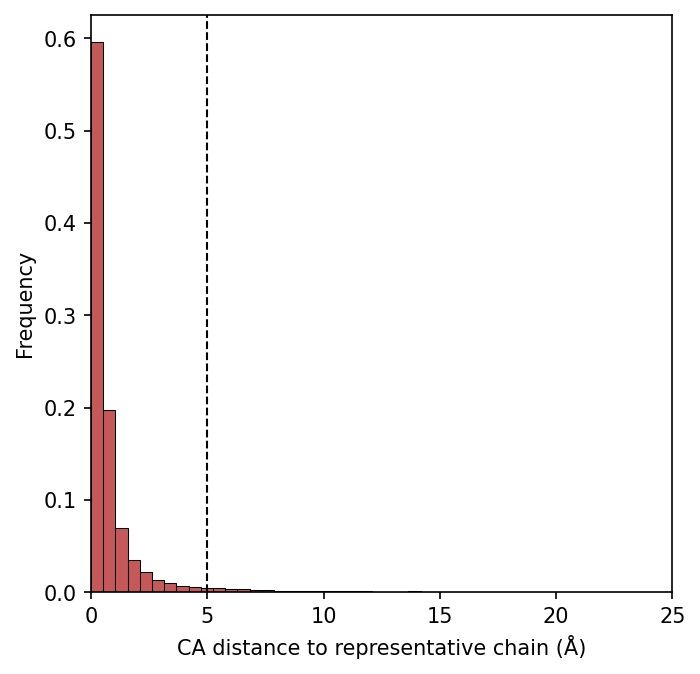

95.75
91.56


In [229]:
len(MEAN_BS_residues)
plt.figure(figsize = (5, 5), dpi = 150)
sns.histplot(MEAN_BS_residues, stat = "proportion", linewidth = 0.5, bins = 400, color = "firebrick")
plt.xlabel('CA distance to representative chain (Å)')
plt.xlim(0, 25)
plt.axvline(x = 5, linestyle = "--", color = "k", linewidth = 1)
plt.ylabel("Frequency")
plt.savefig("./figs/ca_dists_bs_residues_mean.png")
plt.show()


MEAN_BS_residues_filt = [el for el in MEAN_BS_residues if math.isnan(el) == False]

N_BS_mean_residues = len(MEAN_BS_residues_filt)

print(round(100*(len([el for el in MEAN_BS_residues_filt if el <= 5])/N_BS_mean_residues), 2))

print(round(100*(len([el for el in MEAN_BS_residues_filt if el <= 2.5])/N_BS_mean_residues), 2))

### Mean distance per protein (mean of residue means)

#### ALL residues

In [150]:
MEAN_strucs = []
MEAN_strucs_dict = {}
for k, v in dist_df_dicts.items():
    df = v[0]
    if df.empty:
        continue
    try:
        df['res_mean'] = df.apply(lambda row: round(np.nanmean(row), 2), axis=1)
        res_means = df.res_mean.tolist()
        MEAN_strucs.append(round(statistics.mean(res_means), 2))
        MEAN_strucs_dict[k] = round(statistics.mean(res_means), 2)
    except:
        print(df)
        print(res_means)
        break

In [63]:
len(MEAN_strucs)

3137

In [93]:
MEAN_strucs_filt = [el for el in MEAN_strucs if math.isnan(el) == False]

N_strucs = len(MEAN_strucs_filt)

print(round(100*(len([el for el in MEAN_strucs_filt if el <= 5])/N_strucs), 2))

print(round(100*(len([el for el in MEAN_strucs_filt if el <= 2.5])/N_strucs), 2))

95.08
89.84


In [118]:
round(statistics.mean(MEAN_strucs_filt), 2)

1.51

In [119]:
round(statistics.stdev(MEAN_strucs_filt), 2)

4.59

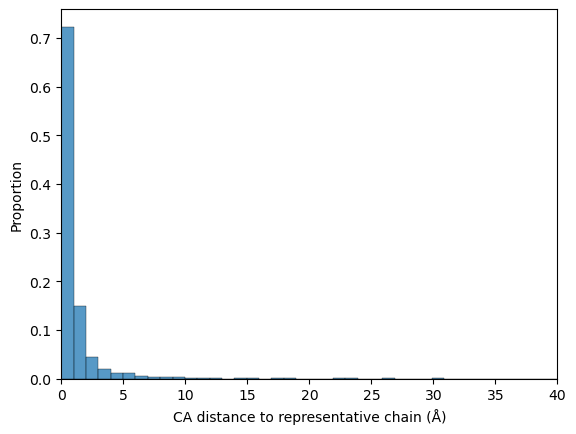

In [75]:
sns.histplot(MEAN_strucs, stat = "proportion", linewidth = 0.25, bins = 100)
plt.xlabel('CA distance to representative chain (Å)')
plt.xlim(0, 40)
plt.show()

#### BS residues

### Examples

In [143]:
dist_df_dicts["Q9Y233_2"][1]

'5c28_B.pkl'

In [171]:
for k, v in MEAN_strucs_dict.items():
    if 2 < v < 3:
        print(k, v)

Q92900_2 2.12
Q92731_1 2.27
Q9HB90_1 2.04
Q92918_1 2.53
P08631_3 2.97
Q13889_1 2.17
P15056_1 2.55
Q02790_1 2.87
Q16539_1 2.9
P01009_1 2.12
P10599_1 2.34
O75800_1 2.06
P15151_1 2.85
P22223_1 2.29
Q9P1U0_1 2.94
Q96RI1_2 2.88
P26196_1 2.06
P06239_4 2.42
P11498_1 2.31
Q9NQR1_1 2.2
Q9NZI2_1 2.69
Q8NEB9_1 2.09
P43246_1 2.97
P12104_1 2.06
Q16611_1 2.7
O43918_1 2.25
P41180_1 2.76
P27918_2 2.88
Q9UKS7_1 2.82
Q5S007_1 2.29
P05230_1 2.75
P00558_1 2.39
Q09472_5 2.16
Q8NET8_1 2.38
P63316_1 2.27
Q9H2G2_1 2.66
P42262_2 2.52
Q86VP1_2 2.72
Q8IWL3_1 2.22
O95749_1 2.09
Q9H9Z2_1 2.62
Q9BYP7_1 2.11
P10721_2 2.81
P00736_1 2.54
Q99584_1 2.09
O75643_1 2.93
Q99717_1 2.34
P84022_1 2.28
Q16658_1 2.68
O00139_1 2.22
P20339_1 2.27
P25311_1 2.3
P11712_1 2.32
P29375_4 2.26
P30626_1 2.24
Q99728_1 2.86
P00740_2 2.96
Q9UGL1_2 2.32
P23246_1 2.33
P35968_1 2.37
P39900_2 2.21
P56696_1 2.95
O15164_1 2.68
Q13153_3 2.51
P20591_1 2.16
Q9NR56_1 2.47
P08138_1 2.23
Q02750_1 2.28
Q9Y233_1 2.01
P18054_1 2.42
P12830_2 2.81
Q9UJ70_1 2

In [187]:
example_dists

,1rdt_C,4xuh_A,4a4w_B,2vv0_A,2zk1_B,7sqb_A,6jey_A,7qb1_A,6md1_B,3osw_B,...,2hwq_A,8aqm_A,7lot_A,8b95_A,5y2o_B,6an1_B,3po9_A,2pob_A,res_mean,Row_Mean
231,NaN,NaN,NaN,NaN,NaN,1.69,NaN,NaN,NaN,NaN,...,NaN,1.80,NaN,0.62,NaN,NaN,NaN,NaN,3.54,3.541687
232,NaN,NaN,NaN,0.88,NaN,1.37,NaN,NaN,NaN,NaN,...,NaN,1.80,NaN,0.67,NaN,NaN,1.71,NaN,1.80,1.801856
233,NaN,NaN,NaN,1.57,NaN,1.50,NaN,1.08,NaN,NaN,...,NaN,1.51,NaN,0.62,NaN,NaN,0.95,NaN,1.67,1.670783
234,NaN,NaN,3.21,1.54,NaN,0.62,NaN,0.87,NaN,NaN,...,NaN,1.38,NaN,0.60,NaN,NaN,0.69,NaN,1.86,1.856340
235,0.31,0.43,0.17,0.98,0.51,0.40,0.88,0.28,0.85,1.61,...,1.52,1.20,0.66,0.37,0.77,NaN,0.59,0.17,0.78,0.781095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,37.34,37.59,33.53,37.64,33.58,34.45,37.41,37.28,33.05,33.43,...,37.11,27.03,37.61,NaN,33.93,33.49,37.06,37.46,35.63,35.626707
502,40.88,41.17,37.68,41.73,NaN,38.61,41.10,41.01,36.35,36.64,...,40.86,29.19,41.39,NaN,36.52,36.84,40.79,40.93,39.39,39.388128
503,44.45,44.86,NaN,45.49,NaN,41.00,45.43,44.38,38.60,NaN,...,43.92,33.75,45.29,NaN,NaN,NaN,44.95,44.69,42.75,42.752987
504,45.60,45.89,NaN,NaN,NaN,41.70,NaN,45.76,NaN,NaN,...,45.06,37.07,NaN,NaN,NaN,NaN,45.53,NaN,44.25,44.254577


2.444584978850297


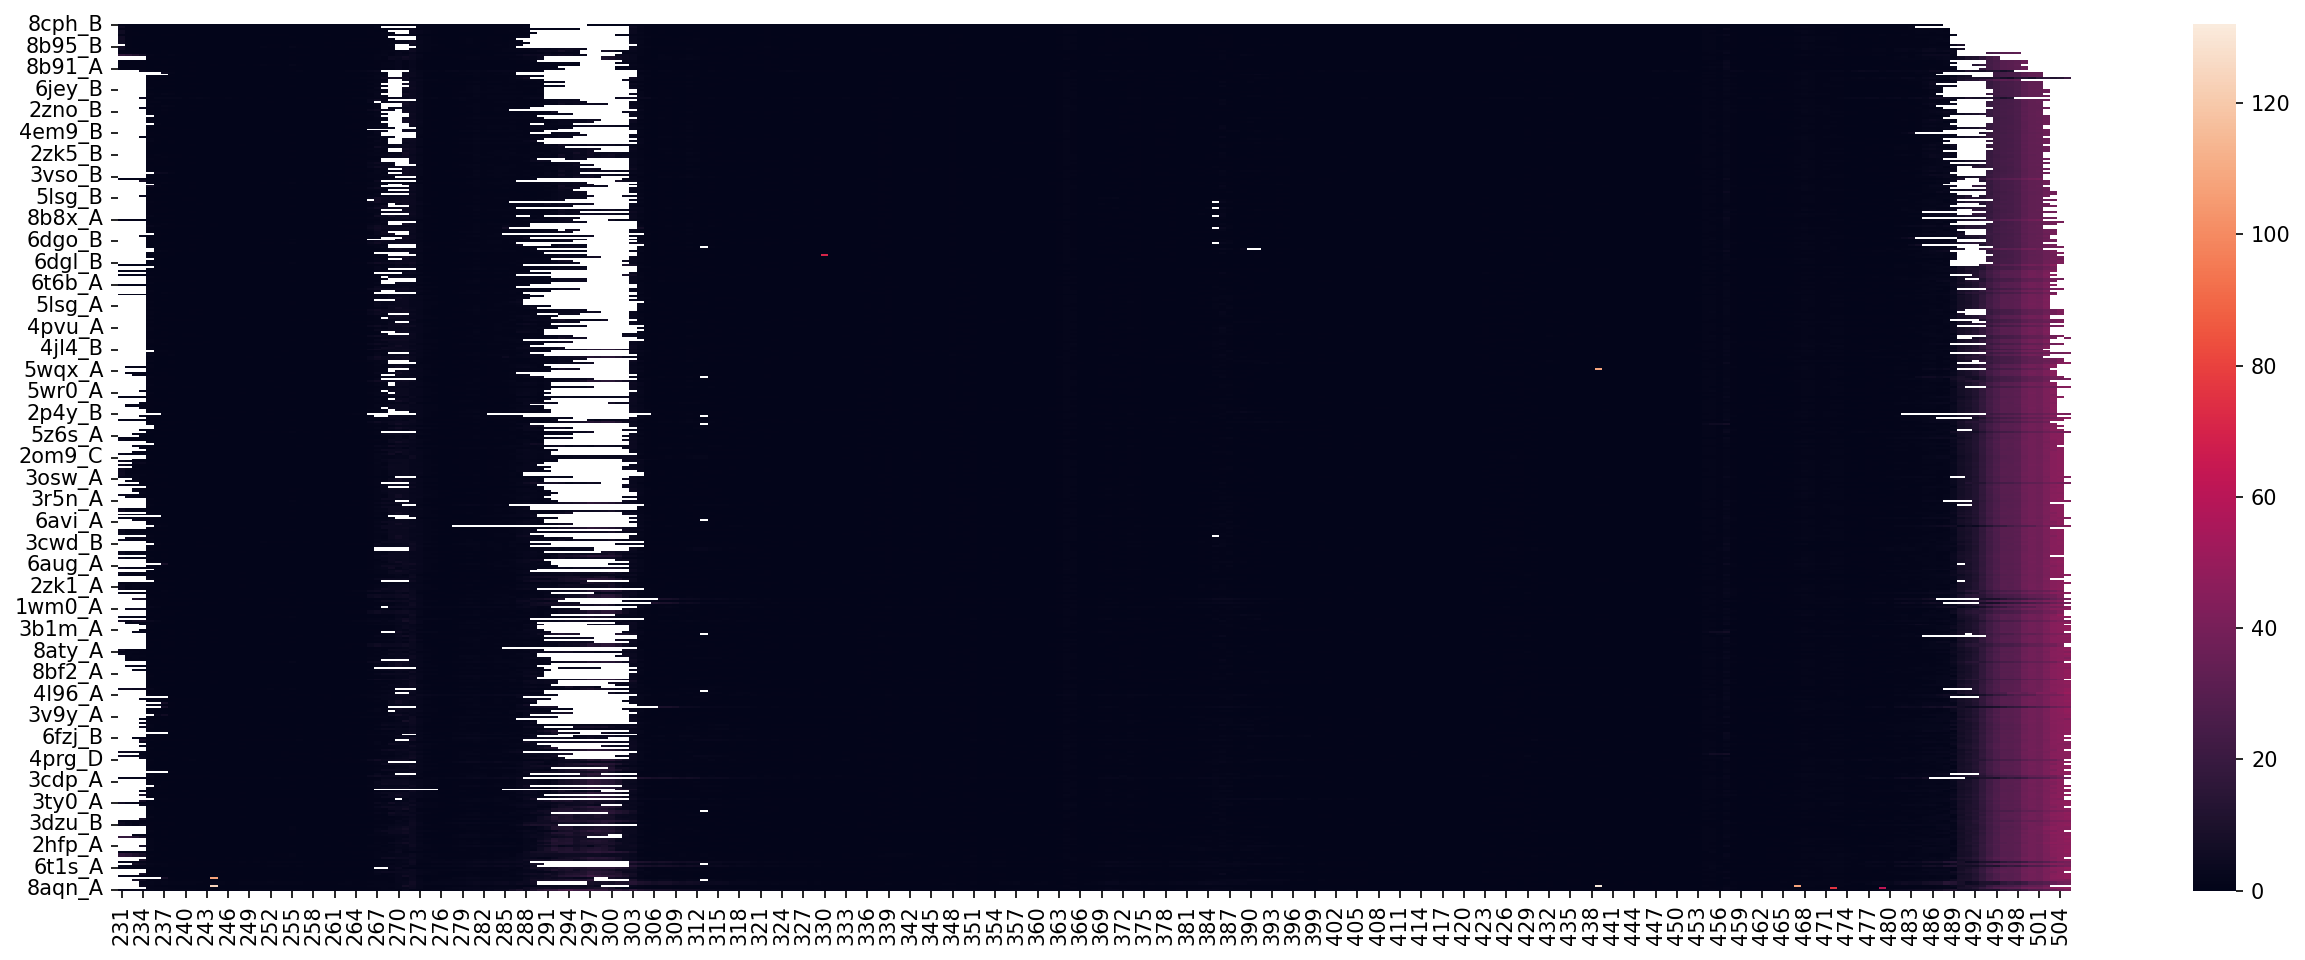

In [185]:
example_dists = dist_df_dicts["P37231_1"][0]
distances_df_with_means = add_mean_columns_rows(example_dists) 
print(distances_df_with_means.loc["Column_Mean", "Row_Mean"])
plt.figure(figsize=(21, 7.5), dpi = 150)
sns.heatmap(distances_df_with_means.T.sort_values("Column_Mean").drop(columns="Column_Mean").drop(index=["Row_Mean", "res_mean"]))
#plt.savefig("./figs/P37231_1_supp.png")
plt.show()

In [180]:
Q9Y233_2_dists = dist_df_dicts["Q9Y233_2"][0]
distances_df_with_means = add_mean_columns_rows(Q9Y233_2_dists) 
distances_df_with_means.loc["Column_Mean", "Row_Mean"]

1.4605876603639985

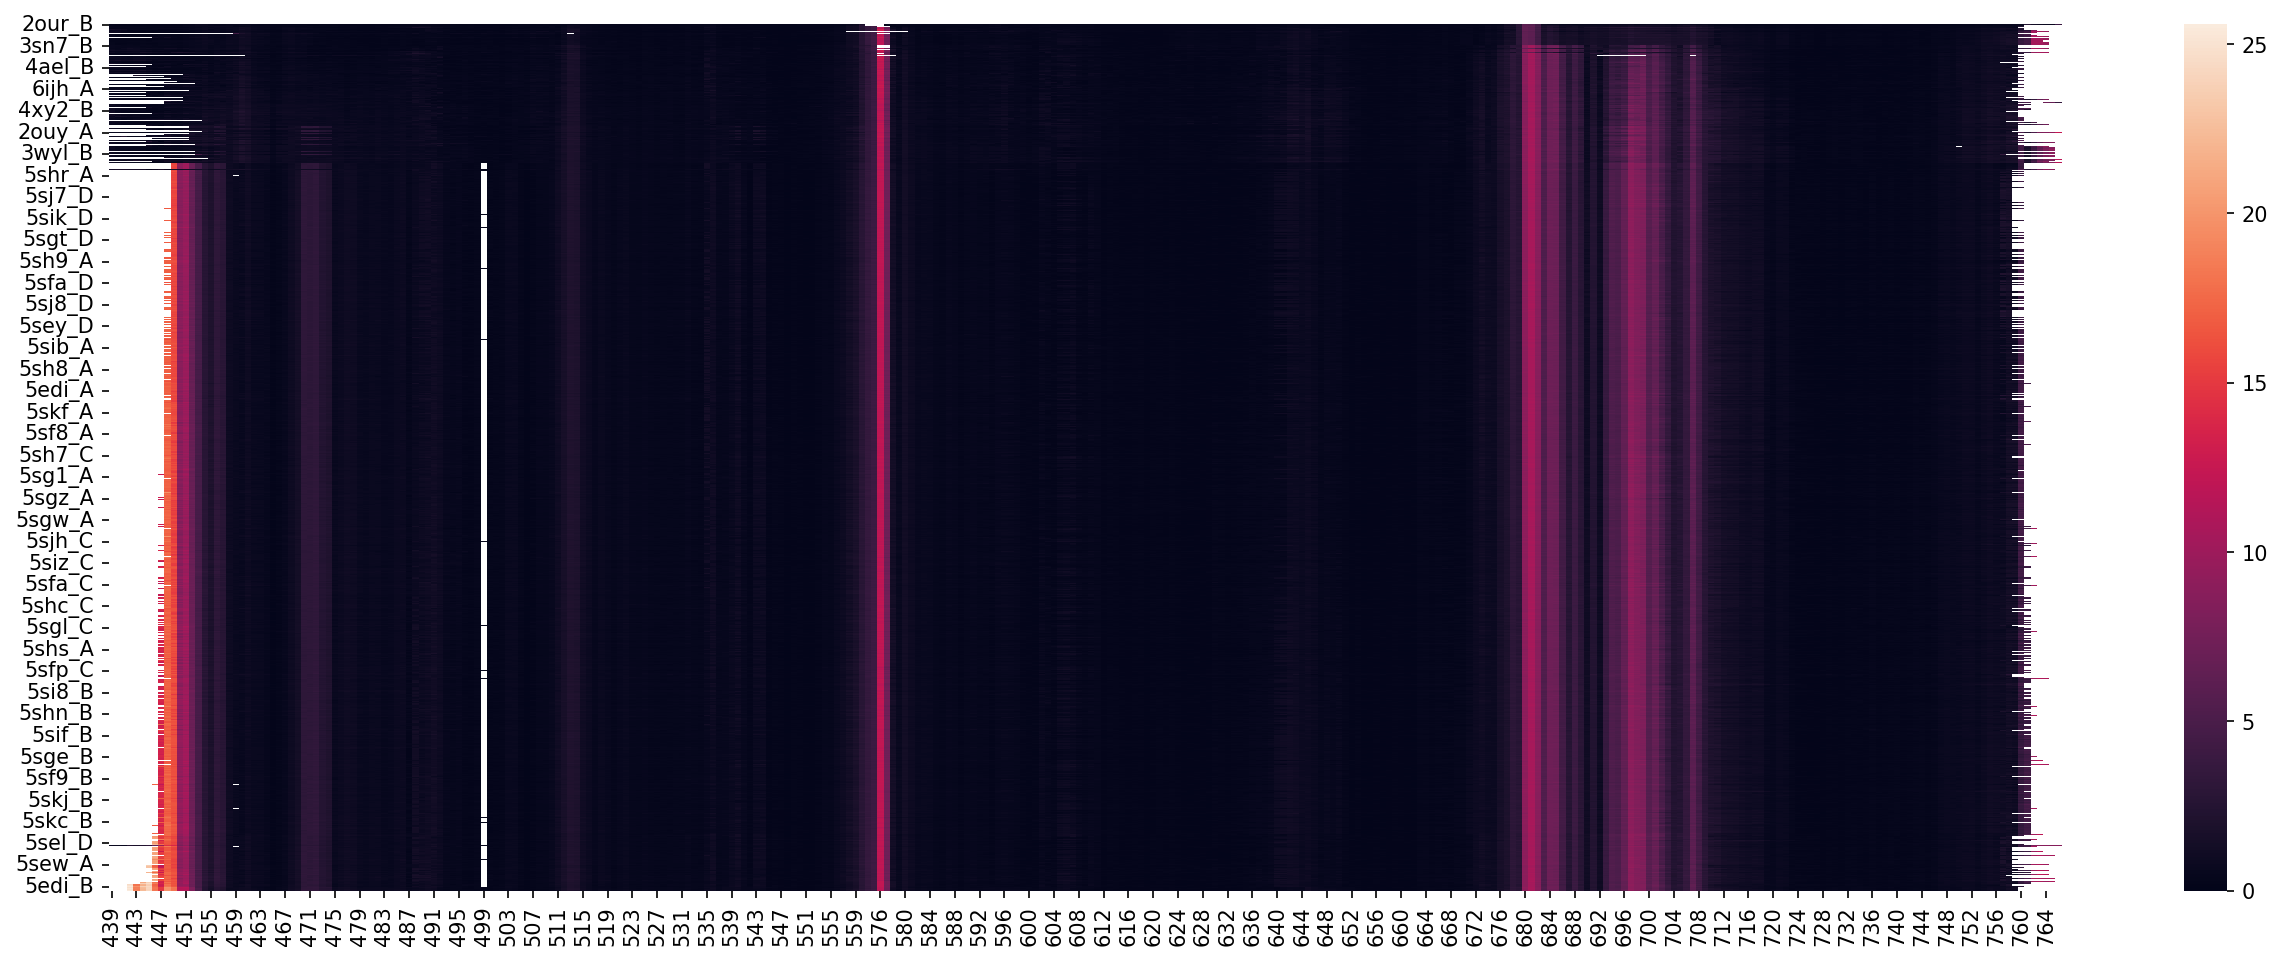

In [139]:
plt.figure(figsize=(21, 7.5), dpi = 150)
sns.heatmap(distances_df_with_means.T.sort_values("Column_Mean").drop(columns="Column_Mean").drop(index="Row_Mean"))
plt.savefig("./figs/Q9Y233_2_supp.png")
plt.show()

In [177]:
P04746_1_dists = dist_df_dicts["P04746_1"][0]
distances_df_with_means = add_mean_columns_rows(P04746_1_dists) 

In [178]:
distances_df_with_means

,1kgu_A,3olg_A,2qmk_A,3bai_A,1xd1_A,5emy_A,5va9_B,1b2y_A,2cpu_A,3bax_A,...,1bsi_A,3bay_A,1u2y_A,6ocn_A,3oli_A,1xh1_A,5u3a_A,5td4_A,res_mean,Row_Mean
17,0.280000,0.22000,0.130000,0.270000,0.380000,0.140000,0.140000,0.310000,0.160000,0.240000,...,0.250000,0.130000,0.350000,0.120000,0.150000,0.320000,0.170000,0.24000,0.230000,0.234038
18,0.290000,0.35000,0.130000,0.250000,0.170000,0.060000,0.090000,0.200000,0.140000,0.150000,...,0.090000,0.090000,0.170000,0.090000,0.070000,0.210000,0.180000,0.08000,0.180000,0.178077
19,0.230000,0.17000,0.270000,0.250000,0.120000,0.150000,0.240000,0.310000,0.240000,0.240000,...,0.290000,0.220000,0.280000,0.230000,0.140000,0.300000,0.300000,0.25000,0.240000,0.242692
20,0.250000,0.21000,0.110000,0.200000,0.180000,0.130000,0.180000,0.170000,0.170000,0.060000,...,0.170000,0.150000,0.260000,0.220000,0.080000,0.240000,0.340000,0.12000,0.190000,0.187115
21,0.240000,0.23000,0.140000,0.210000,0.180000,0.140000,0.160000,0.140000,0.150000,0.150000,...,0.100000,0.220000,0.220000,0.190000,0.110000,0.220000,0.300000,0.11000,0.170000,0.174038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0.100000,0.06000,0.370000,0.310000,0.110000,0.170000,0.200000,0.160000,0.250000,0.060000,...,0.350000,0.330000,0.210000,0.140000,0.190000,0.230000,0.070000,0.13000,0.180000,0.184423
509,0.170000,0.12000,0.200000,0.350000,0.280000,0.260000,0.180000,0.260000,0.260000,0.110000,...,0.380000,0.430000,0.300000,0.230000,0.240000,0.270000,0.130000,0.16000,0.230000,0.234038
510,0.330000,0.30000,0.240000,0.420000,0.290000,0.290000,0.280000,0.350000,0.220000,0.160000,...,0.270000,0.470000,0.340000,0.260000,0.370000,0.340000,0.160000,0.30000,0.300000,0.298269
511,0.370000,0.31000,0.380000,0.550000,0.580000,0.310000,0.510000,0.450000,0.540000,0.170000,...,0.510000,0.580000,0.530000,0.310000,0.440000,0.560000,0.250000,0.46000,0.420000,0.417692


In [179]:
distances_df_with_means.loc["Column_Mean", "Row_Mean"]

0.7187696192696191

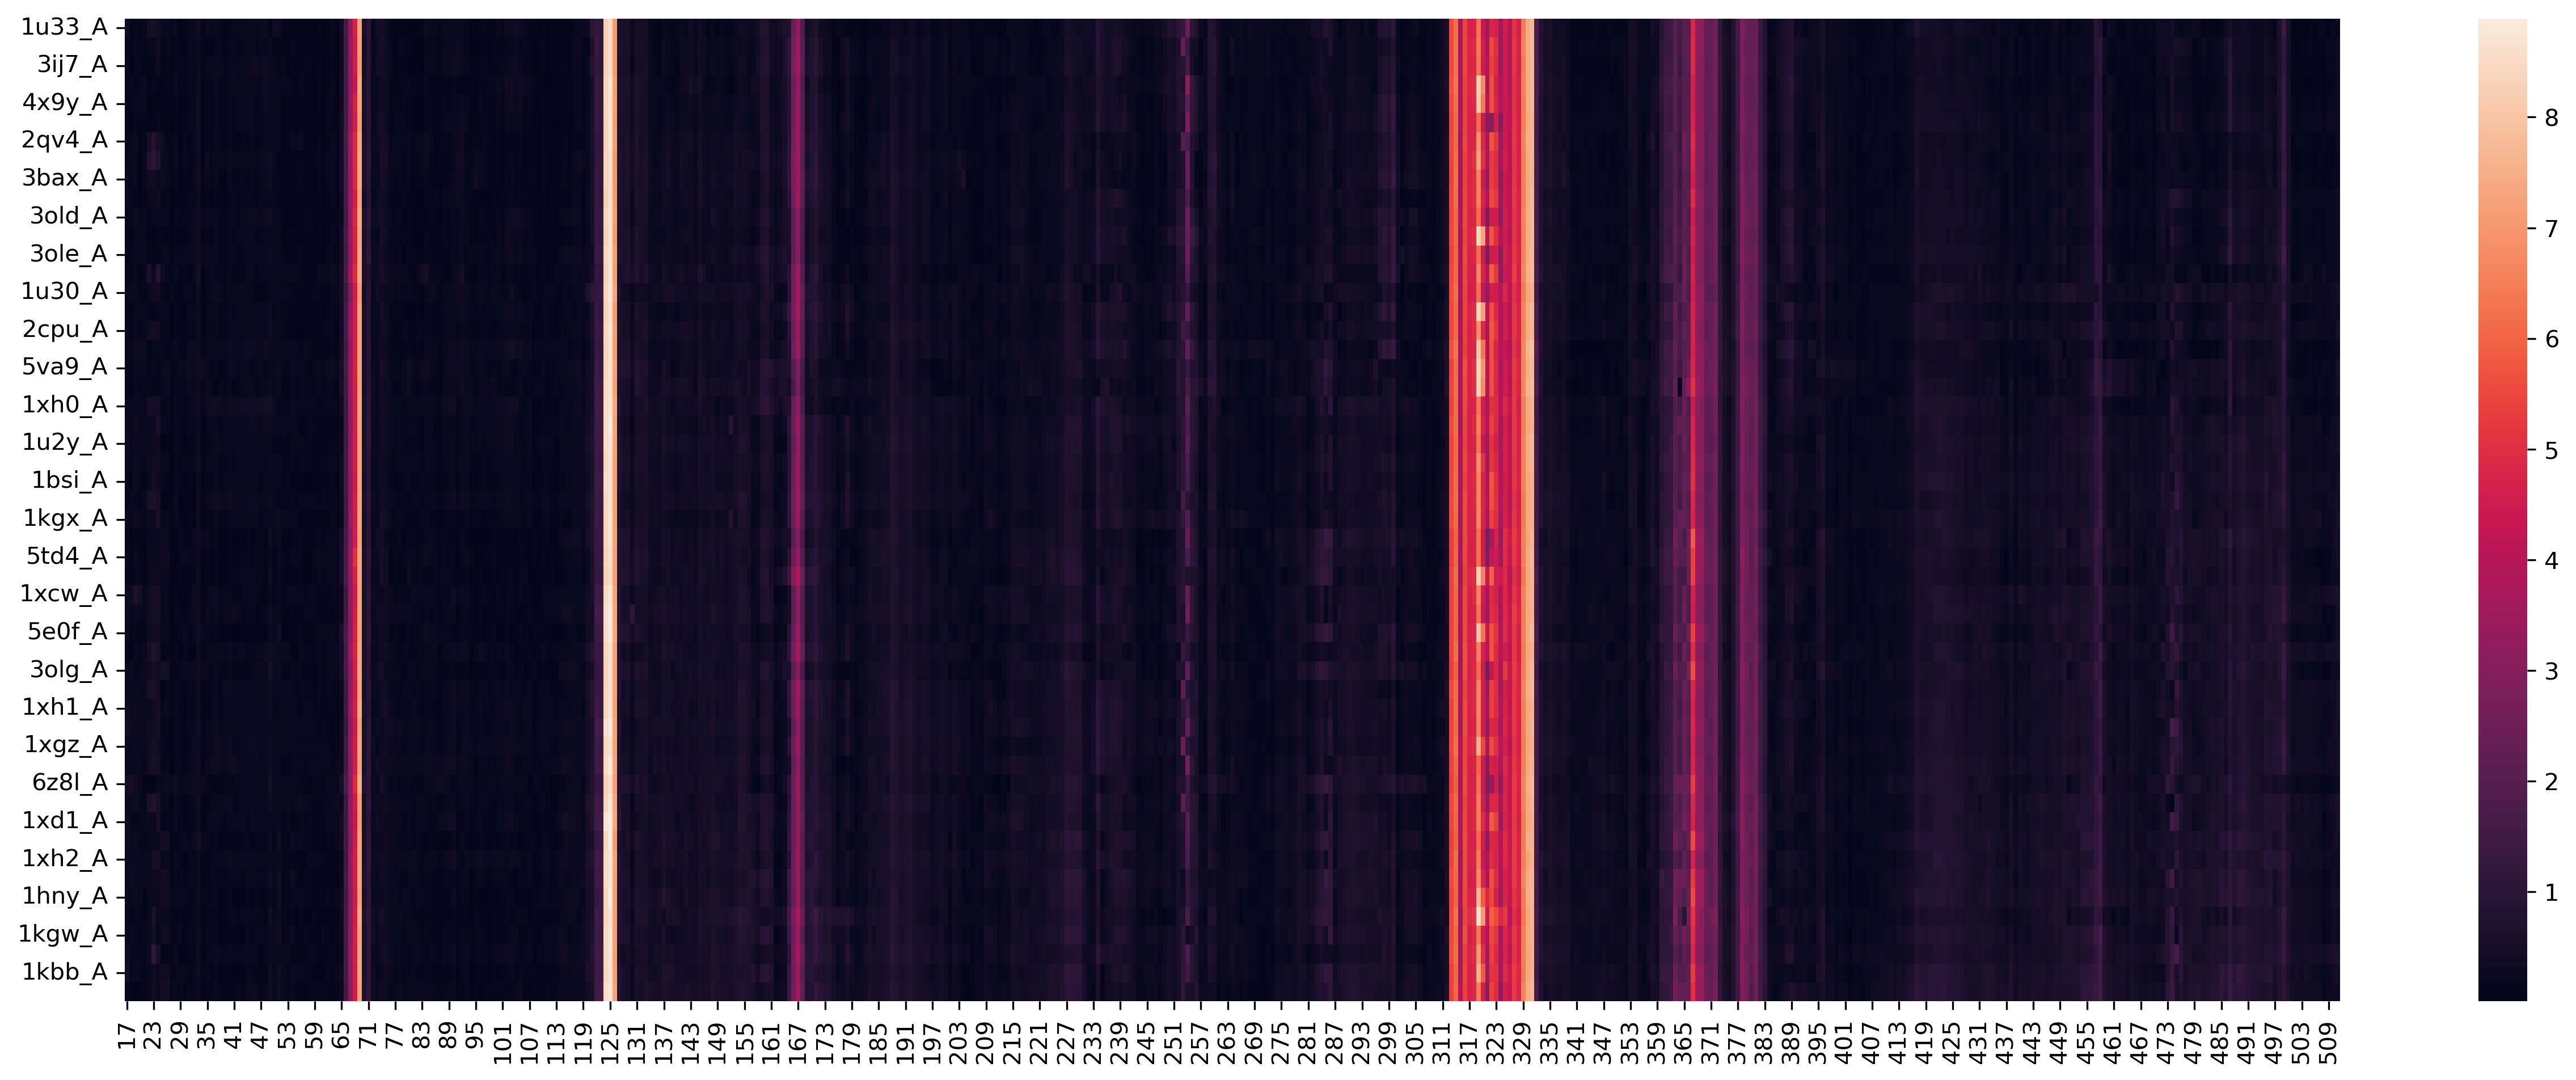

In [135]:
plt.figure(figsize=(21, 7.5), dpi = 300)
sns.heatmap(distances_df_with_means.T.sort_values("Column_Mean").drop(columns="Column_Mean").drop(index="Row_Mean"))
plt.savefig("./figs/P04746_1_supp.png")
plt.show()